# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[antoine.bedaton@ulb.be](mailto:antoine.bedaton@ulb.be) - Student ID 459482__
### Student 2 - __[pierre.defraene@ulb.be](mailto:pierre.defraene@ulb.be) - Student ID 463941__
### Student 3 - __[nathan.marotte@ulb.be](mailto:nathan.marotte@ulb.be) - Student ID 459274__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction

librairies utilisées todo

In [1]:
library("tidyverse")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Data preprocessing

Before starting the project, we need to make sure to keep only the necessary data. In order to do that, we first started to check if there we columns that were 100% equals. To do so, we created a function called $check\_all\_equal$ that will create a combinaison of all the columns of the dataset and will compare them using the $identical$ R function. We noticed that only 2 columns were 100% equals, "quantity" and "quantity_group". Therefore, we decided to remove the "quantity_group" column.

After the first parsing done, we notice that there was still some culumns that were close from being equal but they sometimes differ in one word. For example, the column "payment" and "payment_type" are always the same, they just differ in the notation.




We will first look at all the columns and safely remove all the columns that only have 1 possibility for the row, for exemple in column `recorded_by`, the row is always `GeoData Consultants Ltd`. This can be checked with

In [32]:
training_set_labels <- read.csv(file = 'data/training_set_labels.csv')
test_set_values <- read.csv(file = 'data/test_set_values.csv')
training_set_values <- read.csv(file = 'data/training_set_values.csv')

#training_set_labels
summary(test_set_values)

       id          amount_tsh          date_recorded  
 Min.   :   10   Min.   :     0.0   2013-02-03:  138  
 1st Qu.:18727   1st Qu.:     0.0   2011-03-16:  137  
 Median :37362   Median :     0.0   2011-03-17:  137  
 Mean   :37162   Mean   :   322.8   2011-03-18:  130  
 3rd Qu.:55800   3rd Qu.:    25.0   2011-03-14:  129  
 Max.   :74249   Max.   :200000.0   2011-03-15:  122  
                                    (Other)   :14057  
                    funder       gps_height          installer   
 Government Of Tanzania:2215   Min.   : -57.0   DWE       :4349  
                       : 869   1st Qu.:   0.0             : 877  
 Danida                : 793   Median : 344.0   Government: 457  
 Hesawa                : 580   Mean   : 655.1   RWE       : 292  
 World Bank            : 352   3rd Qu.:1308.0   Commu     : 287  
 Kkkt                  : 336   Max.   :2777.0   DANIDA    : 255  
 (Other)               :9705                    (Other)   :8333  
   longitude        latitude    

In [3]:
for (colname in names(training_set_values)) {
    if (nrow(unique(training_set_values[colname])) == 1){
        print(paste("the column", colname, "has always the same value"))
    }
}
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"recorded_by")] # remove recorded_by
training_set_values

[1] "the column recorded_by has always the same value"


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632177,none,0,⋯,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14746569,Zahanati,0,⋯,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82132853,Kwa Mahundi,0,⋯,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15529772,Zahanati Ya Nanyumbu,0,⋯,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.82535885,Shuleni,0,⋯,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.76558728,Tajiri,0,⋯,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,2012-10-01,Dwsp,0,DWSP,33.36241,-3.76636472,Kwa Ngomho,0,⋯,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,2012-10-09,Rwssp,0,DWE,32.62062,-4.22619802,Tushirikiane,0,⋯,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,2012-11-03,Wateraid,0,Water Aid,32.71110,-5.14671181,Kwa Ramadhan Musa,0,⋯,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


Given the huge amount of data we have, we can also look through the column in which only one value appear most of the time, and drop the column if this number is very high. For exemple, in the column `num_private`, the value `0` appears the most in this dataset(58643/757), we could then simply assume that it is always 0. Considering that, this column don't give us very information and furthermore, we don't have a clear definition of this variable in this dataset.

In [4]:
table(training_set_values["num_private"] == 0)


FALSE  TRUE 
  757 58643 

We can automate this process by looking at the difference between the number of occurences of the most and the least common value for all the columns

In [5]:
#differences <- data.frame(matrix(ncol = 2, nrow = 0))

#for (colname in names(training_set_values)) {
#    maximum <- max(table(training_set_values[colname]))
#    minimum <- min(table(training_set_values[colname]))
#    differences <- rbind(differences, c((maximum-minimum)/59400, colname))
#}
#names(differences) <- c('Difference', 'col_name')
#differences <- differences[order(differences$Difference, decreasing=TRUE),]
#differences


As we can see, only `num_private` has a very high ratio of one value to the rest, so we will only remove the rows for that columns.
We will remove all the rows that contain the value that appears the most in the column `num_private`

In [6]:
#old_count <- nrow(training_set_values)

In [7]:
#argmax <- tail(names(sort(table(training_set_values$num_private))), 1)  # Finds the value that appear the most
#training_set_values = filter(training_set_values, num_private == argmax)  # Filter and keep all the values equal to one
#print(paste("The number of rows of the dataset has been reduced by", 100*(old_count - nrow(training_set_values))/59400, "%"))

## Missing value imputation

## Feature engineering

## Feature selection

In [8]:
options(repr.matrix.max.rows=10, repr.matrix.max.cols=100)
#Read the dataset to the variable training_set_labels
training_set_labels <- read.csv(file = 'data/training_set_labels.csv')
test_set_values <- read.csv(file = 'data/training_set_labels.csv')
training_set_values <- read.csv(file = 'data/training_set_values.csv')



# Adds en empty column functional_need_repairs
training_set_labels <- cbind(training_set_labels, "non_functional" = 0)
# Adds en empty column functional_need_repairs
training_set_labels <- cbind(training_set_labels, "functional_need_repairs" = 0)
# Adds an empty column functional
training_set_labels <- cbind(training_set_labels, "functional" = 0)

# Put 1 in the column depending on the status_group
training_set_labels$non_functional <- ifelse(training_set_labels$status_group == "non functional", 1, 0)
training_set_labels$functional_need_repairs <- ifelse(training_set_labels$status_group == "functional need repairs", 1, 0)
training_set_labels$functional <- ifelse(training_set_labels$status_group == "functional", 1, 0)


# print("start")
# for (col1 in 2:ncol(training_set_values)-1) {
#     for (col2 in col1:ncol(training_set_values)) {
#         if (col1 != col2) {
# #             print(col1)
# #             print(col2)
# #             print(length(training_set_values[, col1]))
# #             print(length(training_set_values[, col2]))
#             print(table(training_set_values[, col1], training_set_values[, col2]))
#         }
#     }
# }


# interesting_column_name <- c(
#     c("waterpoint_type_group", "waterpoint_type"), 
#     c("source_type", "source_class"), 
#     c("source", "source_type"),
#     c("water_quality", "quality_group"),
#     c("quantity", "quantity_group"),
#     c("extraction_type", "extraction_group_type"),
#     c("extraction_type", "extraction_type_class")
#     c("payment", "payment_type"),
#     c("management", "management_group"),
#     c("region", "region_code"),
#     c("basin", "subvillage"))

 #table(training_set_values$waterpoint_type_group, training_set_values$waterpoint_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"waterpoint_type_group")]
 #table(training_set_values$source_type, training_set_values$source_class)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_class")]
 #table(training_set_values$source, training_set_values$source_type)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"source_type")]
 #table(training_set_values$water_quality, training_set_values$quality_group)  # less information
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quality_group")]
 #table(training_set_values$quantity, training_set_values$quantity_group)  # equivalent, we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"quantity_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_group)  # we can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_group")]
 #table(training_set_values$extraction_type, training_set_values$extraction_type_class)  # We can delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"extraction_type_class")]
# table(training_set_values$payment, training_set_values$payment_type)  # equivalent,  we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"payement_type")]
 #table(training_set_values$management, training_set_values$management_group)  # we delete column
training_set_values <- training_set_values[,setdiff(colnames(training_set_values),"management_group")]
 #table(training_set_values$region, training_set_values$region_code)  # very correlated but some cities/code are ambigius
# table(training_set_values$basin, training_set_values$subvillage)  # not really correlated, keep


# head(training_set_values)
names(training_set_values)
length(names(training_set_values))
#training_set_values[-c(40, 38, 37, 33, 35, 26, 27, 31, 29, 14, 12)]
training_set_values
# subvillage > region 
training_set_labels


[1] "id"                "amount_tsh"        "date_recorded"    
 [4] "funder"            "gps_height"        "installer"        
 [7] "longitude"         "latitude"          "wpt_name"         
[10] "num_private"       "basin"             "subvillage"       
[13] "region"            "region_code"       "district_code"    
[16] "lga"               "ward"              "population"       
[19] "public_meeting"    "recorded_by"       "scheme_management"
[22] "scheme_name"       "permit"            "construction_year"
[25] "extraction_type"   "management"        "payment"          
[28] "payment_type"      "water_quality"     "quantity"         
[31] "source"            "waterpoint_type"

[1] 32

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,management,payment,payment_type,water_quality,quantity,source,waterpoint_type
<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,vwc,pay annually,annually,soft,enough,spring,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,wug,never pay,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,vwc,pay per bucket,per bucket,soft,enough,dam,communal standpipe multiple
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,vwc,never pay,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,other,never pay,never pay,soft,seasonal,rainwater harvesting,communal standpipe
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,2013-05-03,Germany Republi,1210,CES,37.16981,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,water board,pay per bucket,per bucket,soft,enough,spring,communal standpipe
27263,4700,2011-05-07,Cefa-njombe,1212,Cefa,35.24999,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,vwc,pay annually,annually,soft,enough,river,communal standpipe
37057,0,2011-04-11,,0,,34.01709,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,,False,0,swn 80,vwc,pay monthly,monthly,fluoride,enough,machine dbh,hand pump


id,status_group,non_functional,functional_need_repairs,functional
<int>,<fct>,<dbl>,<dbl>,<dbl>
69572,functional,0,0,1
8776,functional,0,0,1
34310,functional,0,0,1
67743,non functional,1,0,0
19728,functional,0,0,1
⋮,⋮,⋮,⋮,⋮
60739,functional,0,0,1
27263,functional,0,0,1
37057,functional,0,0,1


At this time, we have remove the column which gave less information or was redundant. Now, we want to look after the correlation between the value and the output

In [34]:
factor_variables <- which(sapply(training_set_values[1,],class)=="factor")
#factor_variables

only_num_var <- training_set_values[,-factor_variables]

#data_train
data_train <- cbind(only_num_var, training_set_labels[2])
data_train
#data_train <- cbind(training_set_values, training_set_labels[2])#

test_set_values
summary(data_train)


id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
69572,6000,1390,34.93809,-9.856322,0,11,5,109,1999,functional
8776,0,1399,34.69877,-2.147466,0,20,2,280,2010,functional
34310,25,686,37.46066,-3.821329,0,21,4,250,2009,functional
67743,0,263,38.48616,-11.155298,0,90,63,58,1986,non functional
19728,0,0,31.13085,-1.825359,0,18,1,0,0,functional
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
60739,10,1210,37.16981,-3.253847,0,3,5,125,1999,functional
27263,4700,1212,35.24999,-9.070629,0,11,4,56,1996,functional
37057,0,0,34.01709,-8.750434,0,12,7,0,0,functional


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
39307,0,2011-02-24,Danida,34,Da,38.85267,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
18990,1000,2011-03-21,Hiap,0,HIAP,37.45163,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
28749,0,2013-03-04,,1476,,34.73980,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,,,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe


       id          amount_tsh         gps_height       longitude    
 Min.   :    0   Min.   :     0.0   Min.   : -90.0   Min.   : 0.00  
 1st Qu.:18520   1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.09  
 Median :37062   Median :     0.0   Median : 369.0   Median :34.91  
 Mean   :37115   Mean   :   317.7   Mean   : 668.3   Mean   :34.08  
 3rd Qu.:55656   3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18  
 Max.   :74247   Max.   :350000.0   Max.   :2770.0   Max.   :40.35  
    latitude        num_private         region_code   district_code  
 Min.   :-11.649   Min.   :   0.0000   Min.   : 1.0   Min.   : 0.00  
 1st Qu.: -8.541   1st Qu.:   0.0000   1st Qu.: 5.0   1st Qu.: 2.00  
 Median : -5.022   Median :   0.0000   Median :12.0   Median : 3.00  
 Mean   : -5.706   Mean   :   0.4741   Mean   :15.3   Mean   : 5.63  
 3rd Qu.: -3.326   3rd Qu.:   0.0000   3rd Qu.:17.0   3rd Qu.: 5.00  
 Max.   :  0.000   Max.   :1776.0000   Max.   :99.0   Max.   :80.00  
   population      construc

We need to transform also categorical variable with 'one-hot-encoding'. To do so, we will use `dummies` package  

In [ ]:
install.packages('dummies')
library(dummies)

In [ ]:
data_factor <- training_set_values[,factor_variables]

In [ ]:
variables_to_keep <- c("water_quality","funder","extraction_type")

data_factor_onehot <- dummy.data.frame(data_factor[,variables_to_keep], sep="_")

dim(data_factor_onehot)
data_factor_onehot[1:2,]

# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


In [ ]:
#install decision tree
install.packages("rpart")
install.packages("rpart.plot")

,id,status_group
,<int>,<fct>
1,50785,functional
2,51630,functional
3,17168,functional
4,45559,non functional
5,49871,functional
⋮,⋮,⋮
14846,39307,non functional
14847,18990,functional
14848,28749,functional


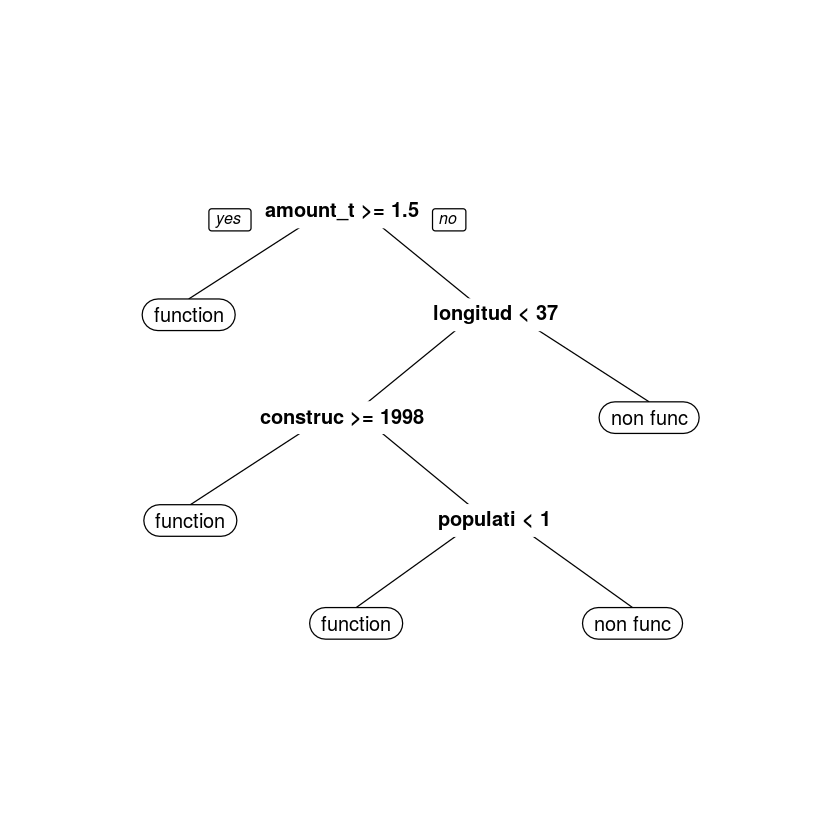

In [42]:

library(rpart)
library(rpart.plot)



# example model 

#DS <- cbind(X, functionnal=Y)
#data_train doit encore être défini data input + status_group

model<- rpart(status_group~., data= data_train, method = 'class') # what we need to change according of the model

prp(model)

predict_unseen <- predict(model,test_set_values, type = 'class')

status_group <-predict_unseen


data_predict <- cbind(test_set_values[1],status_group)

data_predict

write.csv(data_predict,"prediction.csv",row.names = FALSE)







# Alternative models





# Conclusions